<a href="https://colab.research.google.com/github/WilliaaamWang/IntegratedCourseworkWindowing/blob/main/Windowing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def random_sum(x):
  y = 0
  for i in range(300):
    phi = 2*np.pi*random.uniform(0,1)
    y += random.uniform(0,1)*np.sin(2*np.pi*i*x+phi)
  return y

In [ ]:
def two_peaks(x):
  y = np.cos(2*np.pi*x+np.pi*random.uniform(0,1)) + 0.5*np.cos(2*np.pi*x*10-np.pi*random.uniform(0,1))+0.25*np.cos(2*np.pi*x*20-np.pi*random.uniform(0,1))
  return y

In [ ]:
def noise(x):
  y = np.cos(2*np.pi*15+np.pi*random.uniform(0,1)) + np.cos(2*np.pi*x*25-np.pi*random.uniform(0,1))+np.cos(2*np.pi*x*35-np.pi*random.uniform(0,1))
  return y

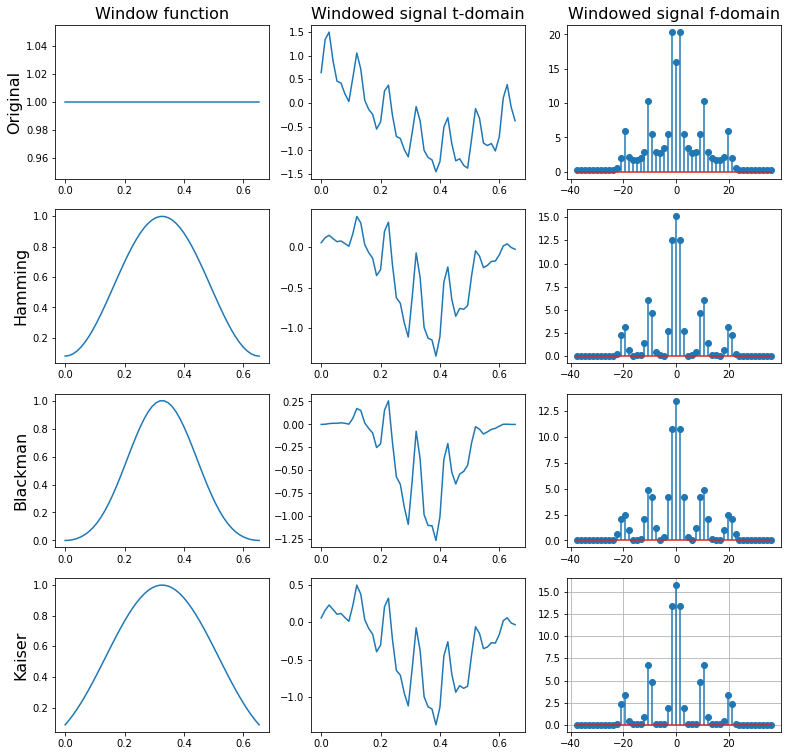

In [ ]:
N = 50
T = 1.0 / 75
x = np.linspace(0.0, N*T, N, endpoint=False)
y = two_peaks(x)

window1 = np.ones(50)
window2 = np.hamming(50)
window3 = np.blackman(50)
max_margin = 0
windowk_b = 0
yk_b = 0
yfk_b = 0
for beta in range(0,10):
  windowk = np.kaiser(50, beta)
  yk = y*windowk
  yfk = np.abs(np.fft.fft(yk,50))
  max_mean_margin = np.max(yfk)/np.mean(yfk)
  if max_mean_margin > max_margin:
    max_margin = max_mean_margin
    windowk_b = windowk
    yk_b = yk
    yfk_b = yfk

y1 = y*window1
y2 = y*window2
y3 = y*window3

yf1 = np.fft.fft(y1,50)
yf2 = np.fft.fft(y2,50)
yf3 = np.fft.fft(y3,50)

xf = np.fft.fftfreq(N, T)
fig, axs = plt.subplots(4, 3, figsize=(13, 13))
axs[0, 0].set_ylabel('Original', fontsize=16)
axs[1, 0].set_ylabel('Hamming', fontsize=16)
axs[2, 0].set_ylabel('Blackman', fontsize=16)
axs[3, 0].set_ylabel('Kaiser', fontsize=16)
axs[0, 0].set_title('Window function', fontsize=16)
axs[0, 1].set_title('Windowed signal t-domain', fontsize=16)
axs[0, 2].set_title('Windowed signal f-domain', fontsize=16)
axs[0, 0].plot(x, window1)
axs[0, 1].plot(x, y)
axs[0, 2].stem(xf, np.abs(yf1))
axs[1, 0].plot(x, window2)
axs[1, 1].plot(x, y2)
axs[1, 2].stem(xf, np.abs(yf2))
axs[2, 0].plot(x, window3)
axs[2, 1].plot(x, y3)
axs[2, 2].stem(xf, np.abs(yf3))
axs[3, 0].plot(x, windowk_b)
axs[3, 1].plot(x, yk_b)
axs[3, 2].stem(xf, yfk_b)
plt.grid()
plt.show()

<StemContainer object of 3 artists>

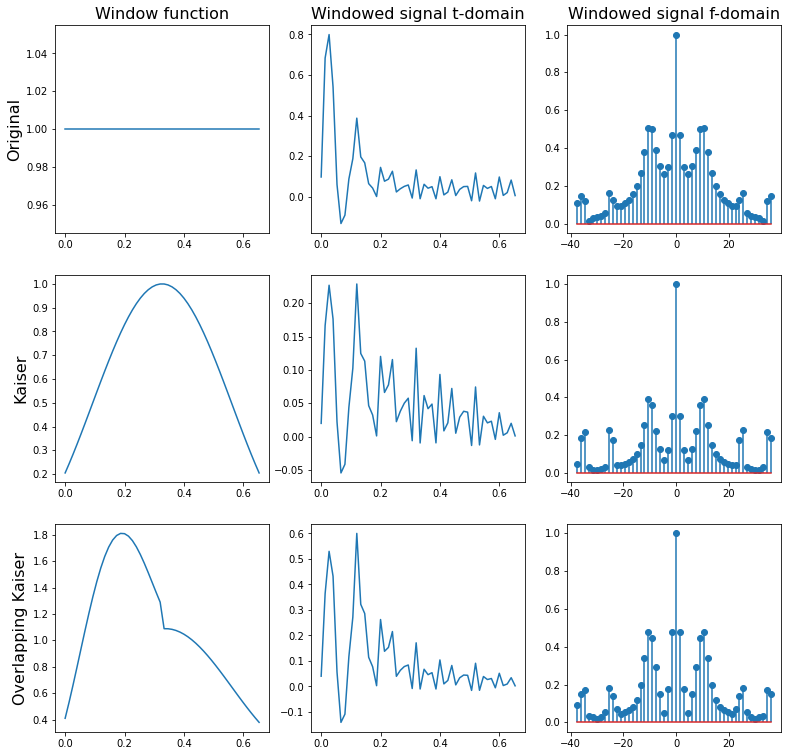

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

beta = 3

N = 50
T = 1.0 / 75
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(2*np.pi*x)*np.exp(-15*x)+np.sin(2*np.pi*x*10)*np.exp(-15*x)
y += noise(x)/25

window1 = np.kaiser(50, beta)
window2 = np.zeros(50)
window2[0:25] = np.kaiser(25, beta)
window2 += window1 + 2*x/7.5

y1 = y
y2 = y*window1
y3 = y*window2

yf1 = np.fft.fft(y1,50)
yf2 = np.fft.fft(y2,50)
yf3 = np.fft.fft(y3,50)

xf = np.fft.fftfreq(N, T)
fig, axs = plt.subplots(3, 3, figsize=(13, 13))

axs[0, 0].set_ylabel('Original', fontsize=16)
axs[1, 0].set_ylabel('Kaiser', fontsize=16)
axs[2, 0].set_ylabel('Overlapping Kaiser', fontsize=16)
axs[0, 0].set_title('Window function', fontsize=16)
axs[0, 1].set_title('Windowed signal t-domain', fontsize=16)
axs[0, 2].set_title('Windowed signal f-domain', fontsize=16)
axs[0, 0].plot(x, np.ones(50))
axs[0, 1].plot(x, y1)
axs[0, 2].stem(xf, np.abs(yf1)/np.max(np.abs(yf1)))
axs[1, 0].plot(x, window1)
axs[1, 1].plot(x, y2)
axs[1, 2].stem(xf, np.abs(yf2)/np.max(np.abs(yf2)))
axs[2, 0].plot(x, window2)
axs[2, 1].plot(x, y3)
axs[2, 2].stem(xf, np.abs(yf3)/np.max(np.abs(yf3)))


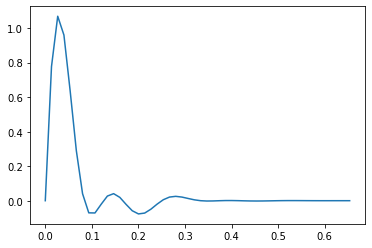

In [ ]:
N = 50
T = 1.0 / 75
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(2*np.pi*x*4)*np.exp(-15*x)+np.sin(2*np.pi*x*8)*np.exp(-15*x)
plt.plot(x, y)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiser

window_length = 1000
overlap = 0.5

shift_amount = int(window_length * (1 - overlap))
window_2 = kaiser(window_length, beta)
window_2 = np.roll(window_2, shift_amount) 
composite_window = window_1 + window_2 
composite_window /= np.max(composite_window) 
plt.plot(window_1, label='Window 1')
plt.plot(window_2, label='Window 2')
plt.plot(composite_window, label='Composite Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title(f'Kaiser Windows (beta={beta}, overlap={overlap})')
plt.legend()
plt.show()

SyntaxError: ignored

/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


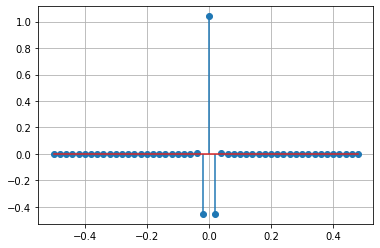

In [ ]:
window1 = np.hamming(50)
yw = np.fft.fft(window1)/25.5
xw = np.fft.fftfreq(50)
plt.stem(xw, np.clip(yw, -75, 25))
plt.grid()
plt.show()

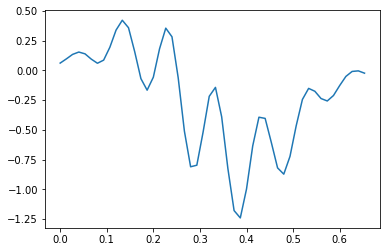

In [ ]:
wave1 = y*window1
plt.plot(x,wave1)
plt.show()

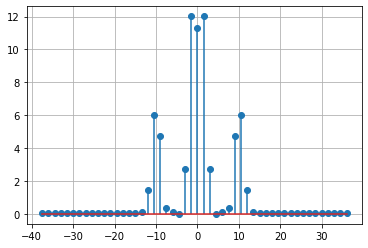

In [ ]:
wf = np.fft.fft(wave1)
xf = np.fft.fftfreq(N, T)
plt.stem(xf, np.abs(wf))
plt.grid()
plt.show()

In [ ]:
def RK4(x, y, f, h):
  k1 = f(x,y)
  k2 = f(x+0.5*h, y+0.5*h*k1)
  k3 = f(x+0.5*h, y+0.5*h*k2)
  k4 = f(x+h, y+h*k3)
  return y + h*(k1+k2*2+k3*2+k4)/6

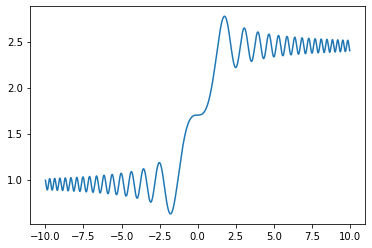

In [ ]:
x = np.arange(0,10,0.01)
Y = np.array((0,1))
Y1 = 1
ys = []
t = np.arange(-10,10,0.01)
def f(x,Y,p=1,alpha=2):
  return np.array((1,-p*p*(1+x)**(-alpha)))*Y[::-1]
def g(x,y):
  return np.sin(x**2)
for i in range(len(t)):
  a = t[i]
  Y1  = RK4(a,Y1,g,0.012)
  ys.append(Y1)
plt.plot(t,ys)
plt.show()

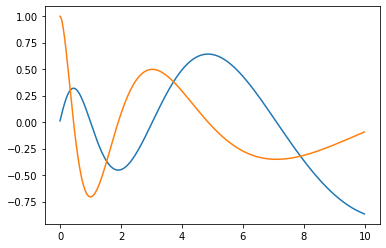

In [ ]:
x = np.arange(0,10,0.01)
Y = np.array((0,1))
ys = []
def f(x,Y,p=3.7757289330961346,alpha=2):
  return np.array((1,-p*p*(1+x)**(-alpha)))*Y[::-1]
for i in range(len(x)):
  a = x[i]
  Y  = RK4(a,Y,f,0.012)
  ys.append(Y)
plt.plot(x,ys)
plt.show()

In [ ]:
def fp(f, p1, p2):
  print(f(p2),f(p1))
  return (f(p2)*p1-f(p1)*p2)/(f(p2)-f(p1))

In [ ]:
x = np.arange(0,1.01,0.01)
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
def RK4(x, y, f, p, h):
  k1 = f(x,y,p)
  k2 = f(x+0.5*h, y+0.5*h*k1, p)
  k3 = f(x+0.5*h, y+0.5*h*k2, p)
  k4 = f(x+h, y+h*k3, p)
  return y + h*(k1+k2*2+k3*2+k4)/6
def f(x,Y,p):
  return np.array((1,-p*p*(1+x)**(-2)))*Y[::-1]
def f7(p):
  x = np.arange(0,1.01,0.01)
  Y = np.array((0,1))
  for i in range(len(x)):
    a = x[i]
    Y  = RK4(a,Y,f,p,0.012)
  return Y[0]
p1 = 4
p2 = 5
dif = 100
while abs(dif) >= 5e-6:
  p = fp(f7, p1, p2)
  dif = f7(p)
  if dif*f7(p1) > 0:
    p2 = p
  else:
    p1 = p
  print(p)
p, dif

-0.2440651428331123 -0.06694430678470628
3.6220416057294873
-0.2440651428331123 0.05092215992005314
3.8599115650847793
-0.2440651428331123 -0.026187224191131148
3.7228818393148173
-0.2440651428331123 0.017071724771805144
3.806372960044952
-0.2440651428331123 -0.009673434838270703
3.7571115186271644
-0.2440651428331123 0.005962906013480974
3.786753101776948
-0.2440651428331123 -0.0034959368650186277
3.769122272673949
-0.2440651428331123 0.00211204071283627
3.779682405969774
-0.2440651428331123 -0.0012533276006399148
3.7733834632240093
-0.2440651428331123 0.0007517545051746784
3.777150010867038
-0.2440651428331123 -0.0004480343043221681
3.7749010770894387
-0.2440651428331123 0.00026804361827947355
3.7762450613136718
-0.2440651428331123 -0.0001599958581759535
3.7754423077677113
-0.2440651428331123 9.563218115680137e-05
3.7759219389576666
-0.2440651428331123 -5.711441104429456e-05
3.775635421755832
-0.2440651428331123 3.412704175018502e-05
3.7758065977740998
-0.2440651428331123 -2.03856871

(3.7757289330961346, 4.346788752595046e-06)